## Blitz


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import os
from torchvision import models,transforms,datasets
import os

In [0]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms. ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ]),
}

data_dir = 'drive/My Drive/IndIan_Food_DatasetM'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else print("Enable GPU"))


In [0]:
class TransferLearn(nn.Module):
  def __init__(self):
    self.pretrained = models.resnet34(pretrained=True)
    self.fc = nn.Linear()
    

dict

In [0]:
image_datasets['train']

Dataset ImageFolder
    Number of datapoints: 3242
    Root location: drive/My Drive/IndIan_Food_DatasetM/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
           )

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

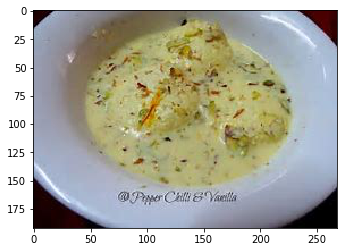

In [0]:
plt.imshow(img_datasets[342][0])

In [0]:
img_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'))

In [0]:
?datasets.ImageFolder()

In [0]:
!cat ../usr/local/lib/python3.6/dist-packages/torchvision/datasets/folder.py

from .vision import VisionDataset

from PIL import Image

import os
import os.path
import sys


def has_file_allowed_extension(filename, extensions):
    """Checks if a file is an allowed extension.

    Args:
        filename (string): path to a file
        extensions (tuple of strings): extensions to consider (lowercase)

    Returns:
        bool: True if the filename ends with one of given extensions
    """
    return filename.lower().endswith(extensions)


def is_image_file(filename):
    """Checks if a file is an allowed image extension.

    Args:
        filename (string): path to a file

    Returns:
        bool: True if the filename ends with a known image extension
    """
    return has_file_allowed_extension(filename, IMG_EXTENSIONS)


def make_dataset(dir, class_to_idx, extensions=None, is_valid_file=None):
    images = []
    dir = os.path.expanduser(dir)
    if not ((extensions is None) ^ (is_valid_file is None)):
        raise ValueError("Both extensions and is_vali